# 第14章聚类方法

1.聚类是针对给定的样本，依据它们属性的相似度或距离，将其归并到若干个“类”或“簇”的数据分析问题。一个类是样本的一个子集。直观上，相似的样本聚集在同类，不相似的样本分散在不同类。

2.距离或相似度度量在聚类中起着重要作用。

常用的距离度量有闵可夫斯基距离，包括欧氏距离、曼哈顿距离、切比雪夫距离、以及马哈拉诺比斯距离。常用的相似度度量有相关系数、夹角余弦。
用距离度量相似度时，距离越小表示样本越相似；用相关系数时，相关系数越大表示样本越相似。

3.类是样本的子集，比如有如下基本定义：
用$G$表示类或簇，用$x_i$,$x_j$；等表示类中的样本，用$d_{ij}$表示样本$x_i$与样本$x_j$之间的距离。如果对任意的$x _ { i } , x _ { j } \in G$，有$$d _ { i j } \leq T$$
则称$G$为一个类或簇。

描述类的特征的指标有中心、直径、散布矩阵、协方差矩阵。

4.聚类过程中用到类与类之间的距离也称为连接类与类之间的距离包括最短距离、最长距离、中心距离、平均距离。

5.层次聚类假设类别之间存在层次结构，将样本聚到层次化的类中层次聚类又有聚合或自下而上、分裂或自上而下两种方法。

聚合聚类开始将每个样本各自分到一个类；之后将相距最近的两类合并，建立一个新的类，重复此操作直到满足停止条件；得到层次化的类别。分裂聚类开始将所有样本分到一个类；之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件；得到层次化的类别。

聚合聚类需要预先确定下面三个要素：

（1）距离或相似度；
（2）合并规则；
（3）停止条件。

根据这些概念的不同组合，就可以得到不同的聚类方法。

6.$k$均值聚类是常用的聚类算法，有以下特点。基于划分的聚类方法；类别数k事先指定；以欧氏距离平方表示样本之间的距离或相似度，以中心或样本的均值表示类别；以样本和其所属类的中心之间的距离的总和为优化的目标函数；得到的类别是平坦的、非层次化的；算法是迭代算法，不能保证得到全局最优。

$k$均值聚类算法，首先选择k个类的中心，将样本分到与中心最近的类中，得到一个聚类结果；然后计算每个类的样本的均值，作为类的新的中心；重复以上步骤，直到收敛为止。

### 层次聚类 

1. **聚合**（自下而上）：聚合法开始将每个样本各自分裂到一个类，之后将相距最近的两类合并，建立一个新的类，重复此操作直到满足停止条件，得到层次化的类别。

2. **分裂**（自上而下）： 分裂法开始将所有样本分到一个类，之后将已有类中相距最远的样本分到两个新的类，重复此操作直到满足停止条件，得到层次化的类别。


### k均值聚类

k均值聚类是基于中心的聚类方法，通过迭代，将样本分到k个类中，使得每个样本与其所属类的中心或均值最近，得到k个平坦的，非层次化的类别，构成对空间的划分。

In [4]:
import math #导包
import random
import numpy as np
from sklearn import datasets,cluster #数据库，聚类
import matplotlib.pyplot as plt

In [5]:
iris = datasets.load_iris() #加载数据集

In [7]:
gt = iris['target'];gt #分类
print(gt)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


3类

In [12]:
iris['data'][:,:2].shape #数据维度

(150, 2)

In [10]:
data = iris['data'][:,:2]
print(data)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [16]:
x = data[:,0] #第一列所有数据
y = data[:,1] #第二列所有数据

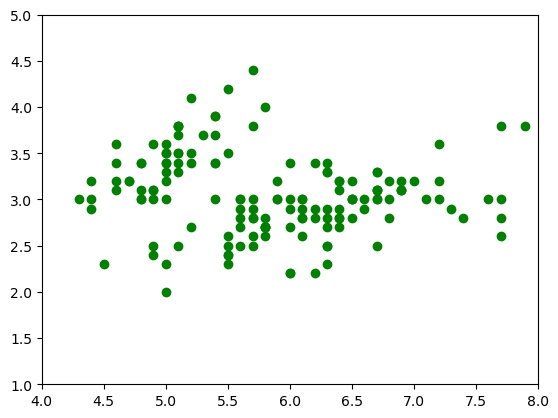

In [17]:
plt.scatter(x, y, color='green') #绘制散点图，绿色圆点
plt.xlim(4, 8) #x轴的数据范围
plt.ylim(1, 5) #y轴的数据范围
plt.show() #显示图

In [18]:
# 定义聚类数的节点

class ClusterNode: #聚类节点
    def __init__(self, vec, left=None, right=None, distance=-1, id=None, count=1): #初始化结点
        """
        :param vec: 保存两个数据聚类后形成新的中心
        :param left: 左节点
        :param right:  右节点
        :param distance: 两个节点的距离
        :param id: 用来标记哪些节点是计算过的
        :param count: 这个节点的叶子节点个数
        """
        self.vec = vec
        self.left = left
        self.right = right
        self.distance = distance
        self.id = id
        self.count = count

In [19]:
def euler_distance(point1: np.ndarray, point2: list) -> float:
    """
    计算两点之间的欧拉距离，支持多维
    """
    distance = 0.0 #初始距离为0
    for a, b in zip(point1, point2):
        distance += math.pow(a - b, 2) #(a-b)的平方
    return math.sqrt(distance) #平方根

In [22]:
# 层次聚类（聚合法）

class Hierarchical:
    def __init__(self, k): #初始化参数
        self.k = k
        self.labels = None
        
    def fit(self, x):
        nodes = [ClusterNode(vec=v, id=i) for i, v in enumerate(x)] #节点
        distances = {} #距离数组
        point_num, feature_num = x.shape #节点数量以及特征数量
        self.labels = [-1] * point_num #将节点标签都置为-1
        currentclustid = -1
        while(len(nodes)) > self.k:
            min_dist = math.inf #math.inf:正无穷大的浮点数
            nodes_len = len(nodes) #节点长度
            closest_part = None #暂无合并的新类
            for i in range(nodes_len - 1): #取类i,j计算距离
                for j in range(i+1, nodes_len):
                    d_key = (nodes[i].id, nodes[j].id)
                    if d_key not in distances:
                        distances[d_key] = euler_distance(nodes[i].vec, nodes[j].vec) #计算两个类之间的距离
                    d = distances[d_key] #记录距离
                    if d < min_dist: #更新最小距离
                        min_dist = d
                        closest_part = (i, j) #将距离最近的两类合并为一个新的类
                        
            part1, part2 = closest_part #取两个新生成的类
            node1, node2 = nodes[part1], nodes[part2]
            new_vec = [ (node1.vec[i] * node1.count + node2.vec[i] * node2.count ) / (node1.count + node2.count) #计算中心
                        for i in range(feature_num)]
            new_node = ClusterNode(vec=new_vec,
                                   left=node1,
                                   right=node2,
                                   distance=min_dist,
                                   id=currentclustid,
                                   count=node1.count + node2.count) #更新新节点信息
            currentclustid -= 1 #新增类数目-1
            del nodes[part2], nodes[part1] #删除节点
            nodes.append(new_node) #添加新结点
            
        self.nodes = nodes
        self.calc_label() #调取聚类结果
        
    def calc_label(self):
        """
        调取聚类的结果
        """
        for i, node in enumerate(self.nodes):
            # 将节点的所有叶子节点都分类
            self.leaf_traversal(node, i)

    def leaf_traversal(self, node: ClusterNode, label):
        """
        递归遍历叶子节点
        """
        if node.left == None and node.right == None: #叶节点
            self.labels[node.id] = label
        if node.left: #递归左子树
            self.leaf_traversal(node.left, label)
        if node.right: #递归右子树
            self.leaf_traversal(node.right, label)
            
# https://zhuanlan.zhihu.com/p/32438294

In [23]:
my = Hierarchical(3) #3类
my.fit(data) #进行训练
labels = np.array(my.labels) #获取标签信息
print(labels) #输出标签

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 1 0 0 1 2 1 0 1 0
 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


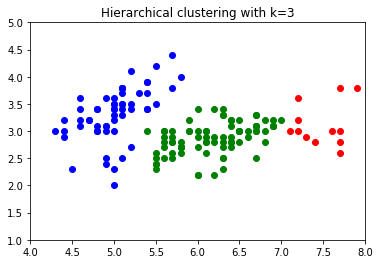

In [12]:
# visualize result

cat1 = data[np.where(labels==0)] #标签为0
cat2 = data[np.where(labels==1)] #标签为1
cat3 = data[np.where(labels==2)] #标签为2

plt.scatter(cat1[:,0], cat1[:,1], color='green') #生成标签为0的数据的散点图，颜色为绿色
plt.scatter(cat2[:,0], cat2[:,1], color='red') #生成标签为1的数据的散点图，颜色为红色
plt.scatter(cat3[:,0], cat3[:,1], color='blue') #生成标签为2的数据的散点图，颜色为蓝色
plt.title('Hierarchical clustering with k=3') #图像标题
plt.xlim(4, 8) #x轴坐标范围
plt.ylim(1, 5) #y轴坐标范围
plt.show() #显示图像

In [13]:
sk = cluster.AgglomerativeClustering(3) #层次聚类
sk.fit(data) #训练数据
labels_ = sk.labels_ #获取标签数据
print(labels_) #输出

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 1 0 1 1 0 2 0 2 0 2 2 2 2 0 0 2 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 2 2 2 2 0 2 1 2 2 2 0 1 2 0 2 0 0 0 0 1 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 0 0]


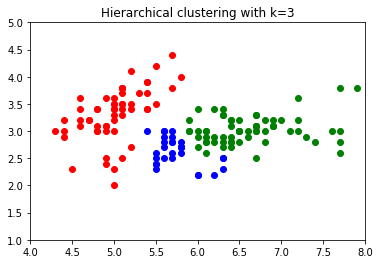

In [14]:
# visualize result of sklearn

cat1_ = data[np.where(labels_==0)] #标签为0
cat2_ = data[np.where(labels_==1)] #标签为1
cat3_ = data[np.where(labels_==2)] #标签为2

plt.scatter(cat1_[:,0], cat1_[:,1], color='green') #生成标签为0的数据的散点图，颜色为绿色
plt.scatter(cat2_[:,0], cat2_[:,1], color='red') #生成标签为1的数据的散点图，颜色为红色
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue') #生成标签为2的数据的散点图，颜色为蓝色
plt.title('Hierarchical clustering with k=3') #图像标题
plt.xlim(4, 8) #x轴坐标范围
plt.ylim(1, 5) #y轴坐标范围
plt.show() #显示图像

---------------------------------------------------------------------------------------------------------------------------------

In [15]:
# kmeans

class MyKmeans:
    def __init__(self, k, n=20): #初始化数据
        self.k = k
        self.n = n
        
    def fit(self, x, centers=None):
        # 第一步，随机选择 K 个点, 或者指定
        if centers is None: #没有中心点
            idx = np.random.randint(low=0, high=len(x), size=self.k) #确定中心点位置
            centers = x[idx] #中心点
        #print(centers)
        
        inters = 0
        while inters < self.n:
            #print(inters)
            #print(centers)
            points_set = {key: [] for key in range(self.k)}

            # 第二步，遍历所有点 P，将 P 放入最近的聚类中心的集合中
            for p in x:
                nearest_index = np.argmin(np.sum((centers - p) ** 2, axis=1) ** 0.5) #最近的点
                points_set[nearest_index].append(p) #聚类中心的集合

            # 第三步，遍历每一个点集，计算新的聚类中心
            for i_k in range(self.k):
                centers[i_k] = sum(points_set[i_k])/len(points_set[i_k])
                
            inters += 1 #遍历次数+1

        
            
        return points_set, centers
        

In [16]:
m = MyKmeans(3)
points_set, centers = m.fit(data) #训练数据

In [17]:
centers #中心

array([[5.006     , 3.428     ],
       [6.81276596, 3.07446809],
       [5.77358491, 2.69245283]])

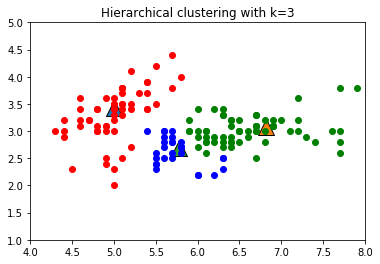

In [18]:
# visualize result

cat1 = np.asarray(points_set[0]) #标签为0的聚类中心的集合
cat2 = np.asarray(points_set[1]) #标签为1的聚类中心的集合
cat3 = np.asarray(points_set[2]) #标签为2的聚类中心的集合

for ix, p in enumerate(centers): #聚类中心
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green') #生成标签为0的数据的散点图，颜色为绿色
plt.scatter(cat2_[:,0], cat2_[:,1], color='red') #生成标签为1的数据的散点图，颜色为红色
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue') #生成标签为2的数据的散点图，颜色为蓝色
plt.title('Hierarchical clustering with k=3') #图像标题
plt.xlim(4, 8) #x轴坐标范围
plt.ylim(1, 5) #y轴坐标范围
plt.show()

In [24]:
# using sklearn
from sklearn.cluster import KMeans #导包 聚类
kmeans = KMeans(n_clusters=3, max_iter=100).fit(data) #训练数据
gt_labels__ = kmeans.labels_ #数据标签
centers__ = kmeans.cluster_centers_ #聚类中心

In [25]:
gt_labels__

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [26]:
centers__

array([[6.81276596, 3.07446809],
       [5.006     , 3.428     ],
       [5.77358491, 2.69245283]])

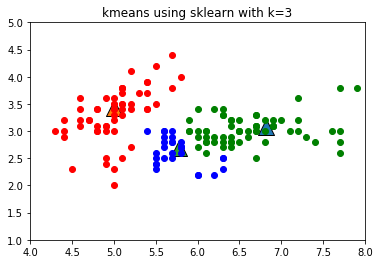

In [27]:
# visualize result

cat1 = data[gt_labels__ == 0] #标签为0的数据集合
cat2 = data[gt_labels__ == 1] #标签为1的数据集合
cat3 = data[gt_labels__ == 2] #标签为2的数据集合

for ix, p in enumerate(centers__): #聚类中心
    plt.scatter(p[0], p[1], color='C{}'.format(ix), marker='^', edgecolor='black', s=256)
        
plt.scatter(cat1_[:,0], cat1_[:,1], color='green') #生成标签为0的数据的散点图，颜色为绿色
plt.scatter(cat2_[:,0], cat2_[:,1], color='red') #生成标签为1的数据的散点图，颜色为红色
plt.scatter(cat3_[:,0], cat3_[:,1], color='blue') #生成标签为2的数据的散点图，颜色为蓝色
plt.title('kmeans using sklearn with k=3') #图像标题
plt.xlim(4, 8) #x轴坐标范围
plt.ylim(1, 5) #y轴坐标范围
plt.show()

#### 寻找 K 值

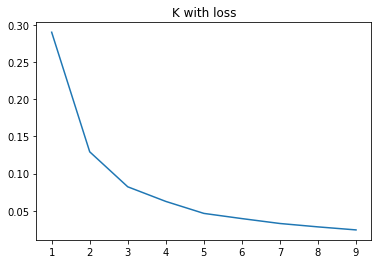

In [28]:
from sklearn.cluster import KMeans

loss = [] #损失

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, max_iter=100).fit(data) #训练数据
    loss.append(kmeans.inertia_ / len(data) / 3) #记录损失

plt.title('K with loss') #图像标题
plt.plot(range(1, 10), loss) #[1,10) 画损失图
plt.show() #显示图像

##### 例 14.2

In [29]:
X = [[0, 2], [0, 0], [1, 0], [5, 0], [5, 2]]

In [30]:
np.asarray(X)

array([[0, 2],
       [0, 0],
       [1, 0],
       [5, 0],
       [5, 2]])

In [31]:
m = MyKmeans(2, 100)
points_set, centers = m.fit(np.asarray(X))

In [32]:
points_set

{0: [array([0, 2]), array([0, 0]), array([1, 0])],
 1: [array([5, 0]), array([5, 2])]}

In [33]:
centers

array([[0, 0],
       [5, 1]])

In [34]:
kmeans = KMeans(n_clusters=2, max_iter=100).fit(np.asarray(X))

In [35]:
kmeans.labels_

array([0, 0, 0, 1, 1])

In [36]:
kmeans.cluster_centers_

array([[0.33333333, 0.66666667],
       [5.        , 1.        ]])

----
本章代码来源：https://github.com/hktxt/Learn-Statistical-Learning-Method

本文代码更新地址：https://github.com/fengdu78/lihang-code

中文注释制作：机器学习初学者公众号：ID:ai-start-com

配置环境：python 3.5+

代码全部测试通过。
![gongzhong](../gongzhong.jpg)